In [113]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [57]:
datos=pd.read_csv('energydata.csv')
df=pd.DataFrame(datos)
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [58]:
data_clasificacion=datos
data_predicción=datos

In [156]:
data_clasificacion["Frio"]=(data_clasificacion['T_out']>0)&(data_clasificacion['T_out']<15)
data_clasificacion["templado"]=(data_clasificacion['T_out']>15)&(data_clasificacion['T_out']<20)
data_clasificacion["caliente"]=(data_clasificacion['T_out']>20)&(data_clasificacion['T_out']<35)
data_clasificacion.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Frio,templado,caliente
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,True,False,False
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,True,False,False
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,True,False,False
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,True,False,False
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,True,False,False


In [40]:
diccionario = {'frio' : range(0,15), 'templado' : range(16,20), 'caliente': range(21,40) }

In [157]:
X= datos[['T8','RH_8','T_out','RH_out']]
y= datos['Frio']

In [158]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=40)
#print(X_train.describe())

In [159]:
X_train.shape


(11841, 4)

Text(0, 0.5, 'exactitud')

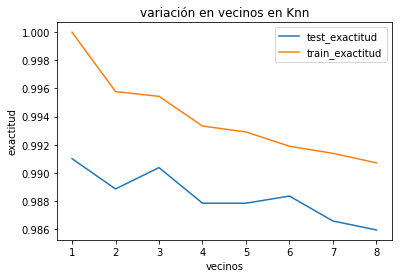

In [160]:
#Entrenamiento del algoritmo
neighbors=np.arange(1,9)
train_exactitud=np.empty(len(neighbors))
test_exactitud=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_exactitud[i]=knn.score(X_train,y_train)
    test_exactitud[i]=knn.score(X_test,y_test)

plt.title('variación en vecinos en Knn')
plt.plot(neighbors, test_exactitud, label='test_exactitud')
plt.plot(neighbors, train_exactitud, label='train_exactitud')
plt.legend()#ejes
plt.xlabel('vecinos')
plt.ylabel('exactitud')


In [161]:
knn=KNeighborsClassifier(n_neighbors=2)#entrenamiento del modelo da bueno con 2
knn.fit(X_train,y_train)
predicts=knn.predict(X_test)#Uso del modelo

exactitud = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts)
sensibilidad = recall_score(y_test, predicts)

f1 = f1_score(y_test, predicts)#puntaje






In [162]:
print(knn.score(X_test,y_test))

0.9888522928806689


In [163]:
#matriz de confución
confusionMatrix = pd.DataFrame(
        confusion_matrix(y_test, predicts),
        columns=['Predijo dentro del rango', 'Predijo fuera del rango'],
        index=['Dentro del rango', 'Fuera del rango']
    )

In [164]:
print("exactitud: ", exactitud)
print("Precision: ", precision)
print("Sensibilidad: ", sensibilidad)
print("Puntaje F1: ", f1)
print("Matriz de confusion:\n", confusionMatrix)

exactitud:  0.9888522928806689
Precision:  0.9971586660684911
Sensibilidad:  0.9897580525456434
Puntaje F1:  0.9934445768772349
Matriz de confusion:
                   Predijo dentro del rango  Predijo fuera del rango
Dentro del rango                      1138                       19
Fuera del rango                         69                     6668
